# Network construction

Network construction is aligned with the questions we aim to answer in the project. For this, the nodes represent the deputies. Two deputies are linked if their voting pattern is similar, which will be made clear below. 

We consider the votings that occurred during a period (year or legislature) in the plenary. 

In [153]:
import pandas as pd
import numpy as np
import networkx as nx

from DadosAbertosBrasil import camara

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import json
import time
from tqdm.notebook import trange
import requests
import re
import os

api = "https://dadosabertos.camara.leg.br/api/v2/"
dados = "http://dadosabertos.camara.leg.br/arquivos/"

## Votings 

### Downloading

Get votings per year and saving it. If you want to use the API, follow the code below. It takes more than 4 hours.  

If you want to download the files, follow the code below. It is faster, but it saves everything on the memory. 

In [154]:
for year in trange(1995,2022, desc='Year'): 
    filepath = '../dados/votacoes-{}.csv'.format(year)
    if os.path.exists(filepath): 
        continue
    else: 
        page = requests.get(dados+'votacoes/csv/votacoes-{}.csv'.format(year))
        with open(filepath, 'w') as f: 
            f.write(page.text)

Year:   0%|          | 0/27 [00:00<?, ?it/s]

In [155]:
for year in trange(1995,2022, desc='Year'): 
    filepath = '../dados/votacoesVotos-{}.csv'.format(year)
    if os.path.exists(filepath): 
        continue
    else: 
        page = requests.get(dados+'votacoes/csv/votacoesVotos-{}.csv'.format(year))
        with open(filepath, 'w') as f: 
            f.write(page.text)

Year:   0%|          | 0/27 [00:00<?, ?it/s]

### Importing 

In [194]:
votings = pd.DataFrame()
for year in range(1995,2022): 
    votings = votings.append(pd.read_csv('../dados/votacoes-{}.csv'.format(year), 
                                         sep = ';', 
                                         index_col=0)[['data', 'siglaOrgao']])

votings_plen = votings[votings.siglaOrgao=='PLEN'][['data']]

votings_plen['data'] = pd.to_datetime(votings_plen['data'])
votings_plen['year'] = votings_plen.data.apply(lambda x: x.year)
votings_plen['month'] = votings_plen.data.apply(lambda x: x.month)
votings_plen.drop(columns='data', inplace = True)

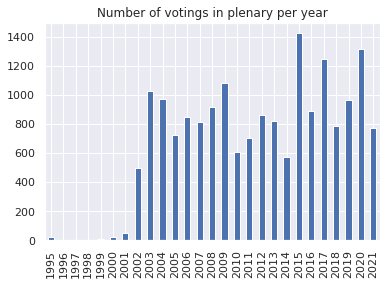

In [195]:
votings_plen.year.value_counts().sort_index().plot.bar()
plt.title('Number of votings in plenary per year')
plt.show()

In [222]:
votings[votings.data.str.contains('1996')].siglaOrgao.value_counts(normalize = True)

CCJC      0.514851
CFT       0.099010
CDC       0.075908
CSSF      0.072607
CTASP     0.056106
CE        0.039604
CCTCI     0.033003
CVT       0.033003
CDEICS    0.029703
CDU       0.013201
CFFC      0.009901
CAPADR    0.009901
CME       0.006601
MESA      0.003300
PLEN      0.003300
Name: siglaOrgao, dtype: float64